![alt text](PaletteSkills_Banner.png "Banner")
# Final Assignment 5: Analyzing Rural Municipality Crop Yield Prediction

## Objective

The objective of this assignment is to provide hands-on experience in data science, including data cleaning, exploration, visualization, feature selection, and machine learning model deployment. The focus is on analyzing the Rural Municipality Yield Data from 1938 to 2021 to identify trends, patterns, and insights, and using machine learning techniques to predict crop yields for the top 10 most consumed crops all over the Saskatchewan.

## Crop Yield Prediction

Agriculture is critical to the global economy, and understanding crop yield is essential for addressing food security challenges and reducing the impacts of climate change. Crop yield prediction is a crucial agricultural problem that depends on weather conditions, pesticides, and accurate information about the history of crop yield. This paper focuses on predicting the top 10 most consumed crops in the Saskatchewan using machine learning techniques.

The crops that will be considered are:
- Winter Wheat
- Canola
- Spring Wheat
- Mustard
- Durum
- Sunflowers
- Oats
- Lentils
- Peas
- Barley
- Fall Rye
- Canary Seed
- Spring Rye
- Tame Hay
- Flax
- Chickpeas

## Data

1. **Yield Data**
The Rural Municipality Yield Data contains the yield data for crops grown in rural municipalities from 1938 to 2021. The data includes the following fields:

- **Year:** The year for which the yield data was collected.
- **Municipality:** The name of the rural municipality. 
- **Crops:** The type of crops grown.
- **Yield (bu/acre):** The yield of the crop in kilograms per hectare.

2. **GIS Data**

The column names in the GIS Data
- PPID
- EFFDT
- EXPDT
- FEATURECD
- RMNO
- RMNM
- SHAPE_AREA
- SHAPE_LEN
- geometry

### Work Plan
1. **Collection and Understanding**
- Import libraires
- Load data
- Create dataframes, variables

2. **Data Cleaning and Preparation**
- Check for and remove missing values
- Identify and handle outliers
- Transform the data if necessary

3. **Data Exploration**
- Generate summary statistics
- Create visualizations
- Identify trends, patterns, and outliers

4. **Statistical Analysis**
- Perform regression analysis and one supervised and one unsupervised machine learning techniques to understand the relationship between different variables and the yield of crops.

5. **Insights and Conclusions**
- Identify which crops have the highest yields
- Determine which rural municipalities have the most productive farmland
- Identify which years had the best yields overall

6. **Crop Yield Prediction**
- Use machine learning techniques to predict the yield of the top 10 most consumed crops
- Evaluate the accuracy of the model

7. **Final Report**
- Summarize the findings and conclusions
- Include visualizations to support the analysis
- Provide recommendations for future research

By following this work plan, we will be able to analyze the Rural Municipality Yield Data and predict the yield of the top 10 most consumed crops. The final report will provide valuable insights for addressing food security challenges and reducing the impacts of climate change.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## 1. Collection & Understanding Data
- Import libraires
- Load data
- Create dataframes, variables

1. **Yield Data**
The Rural Municipality Yield Data contains the yield data for crops grown in rural municipalities from 1938 to 2021. The data includes the following fields:

- **Year:** The year for which the yield data was collected.
- **Municipality:** The name of the rural municipality. 
- **Crops:** The type of crops grown.
- **Yield (bu/acre):** The yield of the crop in kilograms per hectare.

2. **GIS Data**

The column names in the GIS Data
- PPID
- EFFDT
- EXPDT
- FEATURECD
- RMNO
- RMNM
- SHAPE_AREA
- SHAPE_LEN
- geometry

In [130]:
# Read in the data from github repo
rm_crop_yields1 = pd.read_csv('https://raw.githubusercontent.com/ruhidm/Palette_Training_5/main/rm_crop_yields_1938_2021.csv')

In [131]:
# Read in data
geo_df = gpd.read_file('Rural Municipality\Rural Municipality.shp')

In [132]:
print(rm_crop_yields1.info())
print(geo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

In [133]:
print(rm_crop_yields1.shape)
print(geo_df.shape )

(25017, 18)
(298, 9)


In [134]:
rm_crop_yields1.head(1)

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN


In [135]:
geo_df.head(1)

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,NaN,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."


In [136]:
# rename the column in the geo_df
geo_df.rename(columns={'RMNO': 'RM',}, inplace=True)

# change the data type of the RM column in the geo_df to int64
geo_df['RM'] = geo_df['RM'].astype('int64')

In [137]:
# find the unique values in the RM column
print(rm_crop_yields1['RM'].unique())
print(geo_df['RM'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  17  18  19  31  32  33
  34  35  36  37  38  39  40  42  43  44  45  46  49  51  61  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 141 142 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 171 181 183 184 185 186 187 189 190 191 193 194 211 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 228 229 230 231 232 241
 243 244 245 246 247 248 250 251 252 253 254 255 256 257 259 260 261 271
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 292
 301 303 304 305 307 308 309 310 312 313 314 315 316 317 318 319 320 321
 322 331 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 349
 350 351 352 366 367 368 369 370 371 372 373 376 377 378 379 380 381 382
 394 395 397 398 399 400 401 402 403 404 405 406 40

In [138]:
#merge the two dataframes
df_merged = rm_crop_yields1

In [139]:
# Check the shape and summary statistics of the data
print(df_merged.shape)
print(df_merged.describe())

(25017, 18)
               Year            RM  Winter Wheat        Canola  Spring Wheat  \
count  25017.000000  25017.000000    3037.00000  14008.000000  24924.000000   
mean    1979.385938    248.957509      38.24350     24.146796     25.778733   
std       24.221744    148.829628      12.20715      9.209177     11.153028   
min     1938.000000      1.000000       3.00000      0.000000      0.000000   
25%     1958.000000    124.000000      30.00000     18.000000     19.000000   
50%     1979.000000    247.000000      38.00000     23.000000     25.600000   
75%     2000.000000    370.000000      45.50000     29.200000     31.800000   
max     2021.000000    622.000000      90.00000     59.500000    198.000000   

           Mustard         Durum   Sunflowers          Oats      Lentils  \
count  4487.000000  11581.000000   946.000000  23913.000000  5515.000000   
mean    844.185955     29.024429   692.629915     47.104433  1171.778849   
std     275.700375      9.829962   555.776604   

## 2. Data Cleaning and Preparation
- Check for and remove missing values
- Identify and handle outliers
- Transform the data if necessary

In [140]:
# Transform the data type of the Year column in the rm_crop_yields to datetime
df_merged['Year'] = pd.to_datetime(df_merged['Year'], format='%Y')

# in the Year column, extract the year and store it in a new column called Year
df_merged['Year'] = df_merged['Year'].dt.year

In [141]:
print(df_merged.isna().sum())
# Check for missing values
print("Missing values:", df_merged.isnull().sum().sum())

# Check for duplicates
print("Number of duplicates:", df_merged.duplicated().sum())

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64
Missing values: 232454
Number of duplicates: 0


In [142]:
def impute_missing_values(df, rm, column_name):
    # Subset the DataFrame to the current RM and column
    rm_df = df[(df['RM'] == rm) & df[column_name].notnull()]
    # Calculate the mean of the non-missing values for the specified column
    mean_value = rm_df[column_name].mean()
    # Replace missing values in the specified column with the mean of the non-missing values
    df.loc[(df['RM'] == rm) & df[column_name].isnull(), column_name] = mean_value
    # Return the DataFrame with missing values imputed for the specified column
    return df
# Define a list of column names with missing values
columns_with_missing_values = ['Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard', 'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye', 'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas']

# Loop through each RM and column with missing values and impute the missing values with the mean of the non-missing values for that column
for rm in df_merged['RM'].unique():
    for column_name in columns_with_missing_values:
        df_merged = impute_missing_values(df_merged, rm, column_name)

df_merged.fillna(0, inplace=True)

In [143]:
df_merged.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,42.945217,21.947115,4.0,758.895,23.922286,1170.557895,1.0,902.666667,32.5,1.0,27.195789,964.0,0.0,1.268571,0.0,0.0
1,1939,1,42.945217,21.947115,9.0,758.895,23.922286,1170.557895,16.0,902.666667,32.5,16.0,27.195789,964.0,0.0,1.268571,0.0,0.0
2,1940,1,42.945217,21.947115,12.0,758.895,23.922286,1170.557895,23.0,902.666667,32.5,19.0,27.195789,964.0,0.0,1.268571,8.0,0.0
3,1941,1,42.945217,21.947115,18.0,758.895,23.922286,1170.557895,32.0,902.666667,32.5,28.0,27.195789,964.0,0.0,1.268571,5.0,0.0
4,1942,1,42.945217,21.947115,20.0,758.895,23.922286,1170.557895,35.0,902.666667,32.5,28.0,14.000000,964.0,0.0,1.268571,5.0,0.0


In [144]:
df_merged.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [145]:
geo_df1 = geo_df

# drop the columns in the geo_df
geo_df1 = geo_df.drop(['EXPDT'], axis=1)

# sort the values of geo_df1 by RM
geo_df1.sort_values(by=['RM'], inplace=True)

In [146]:
merged = geo_df.merge(df_merged, on='RM', how='left')

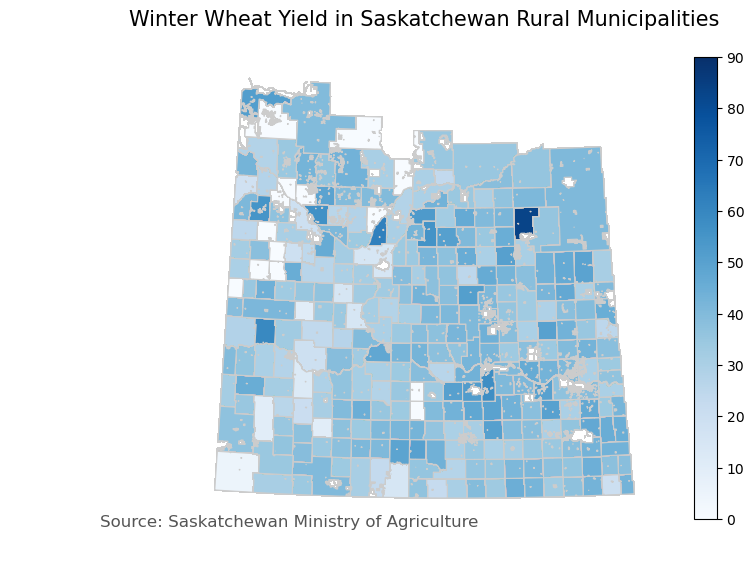

In [147]:
# Plot choropleth map
variable = 'Winter Wheat'
vmin, vmax = merged[variable].min(), merged[variable].max()
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title(f'Winter Wheat Yield in Saskatchewan Rural Municipalities\n', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: Saskatchewan Ministry of Agriculture', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.show()

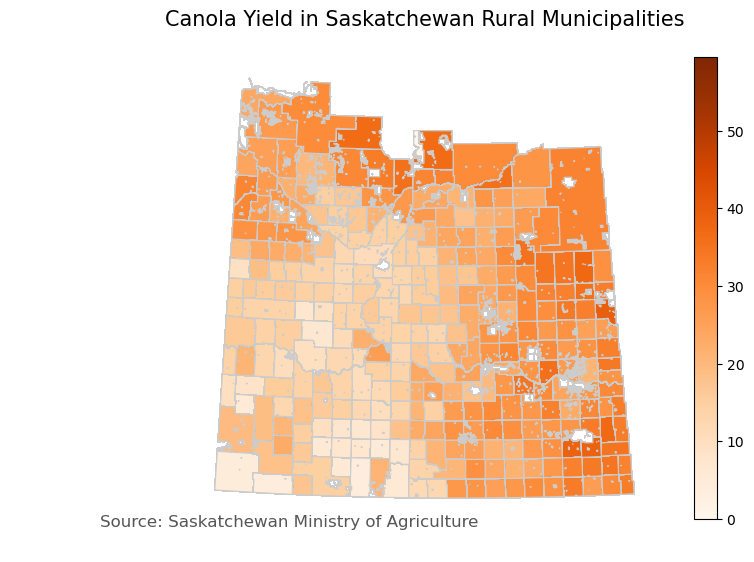

In [148]:
# Plot choropleth map
variable = 'Canola'
vmin, vmax = merged[variable].min(), merged[variable].max()
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title(f'Canola Yield in Saskatchewan Rural Municipalities\n', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: Saskatchewan Ministry of Agriculture', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.show()

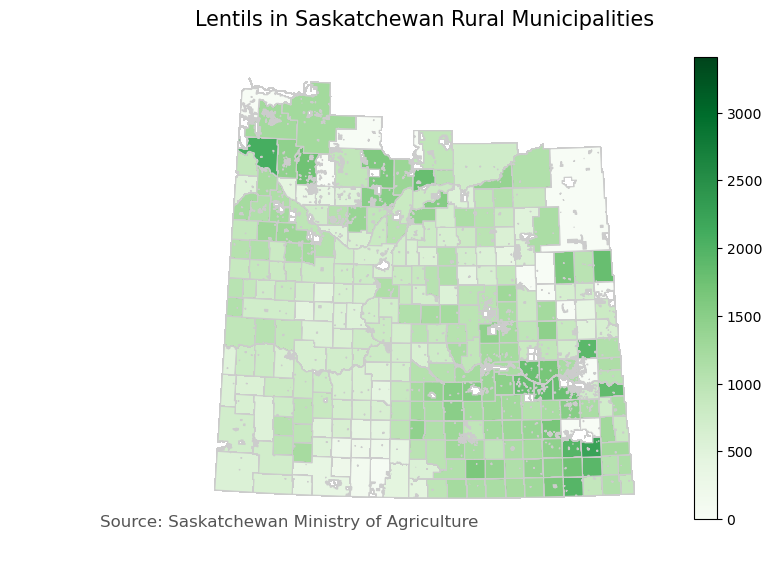

In [149]:
# Plot choropleth map
variable = 'Lentils'
vmin, vmax = merged[variable].min(), merged[variable].max()
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title(f'Lentils in Saskatchewan Rural Municipalities\n', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: Saskatchewan Ministry of Agriculture', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.show()